# DSE 201 -- Final Exam
## Orysya Stus
## 3.20.2017

In [50]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn import metrics
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline

## For a refresher on Bernoulli Native Bayes review:
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py

## Q4
For this problem, you'll be using the 20 Newsgroups data set. There are several versions of it on the web. You should download "20news-bydate.tar.gz" from http://qwone.com/~jason/20Newsgroups/

The same website has a processed version of the data, "20news-bydate-matlab.tgz", that is particularly convenient to use. Download this and also the file "vocabulary.txt". Look at the first training document in the processed set and the corresponding original text document to understand the relation between the two. The words in the documents constitute an overall vocabulary V of size 61188. Build a Bernoulli Naive Bayes model using the training data. Write a routine that uses this naive Bayes model to classify a new document. To avoid underflow, work with logs rather than multiplying together probabilities.

### Part (a)
Evaluate the performance of your model on the test data. What error rate do you achieve?

In [2]:
train = sklearn.datasets.load_files('./20news-bydate-train/', load_content=True, encoding='utf-8', decode_error='ignore')
test = sklearn.datasets.load_files('./20news-bydate-test/', load_content=True, encoding='utf-8', decode_error='ignore')

In [3]:
vocab = {}
reverse_vocab = {}
count = 0
a = open('./vocabulary.txt', 'r')
for v in a:
    val = v.strip()
    vocab[val] = count
    reverse_vocab[count] = val
    count += 1  

In [4]:
categories = {}
for i,e in enumerate(test.target_names):
    categories[i] = e

In [5]:
test_map = dict(enumerate(test.filenames))
reverse_test_map = {v:k for k,v in test_map.items()}

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(strip_accents='unicode', decode_error = 'ignore', stop_words='english', vocabulary=vocab)
X_train_counts = count_vect.fit_transform(train.data)
training_feature_names = count_vect.get_feature_names()
X_train_counts.shape

(11314, 61188)

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()
X_train_tfidf = tf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 61188)

In [8]:
count_vect = CountVectorizer(strip_accents='unicode', decode_error = 'ignore', stop_words='english', vocabulary=vocab)
X_test_counts = count_vect.fit_transform(test.data)
test_feature_names = count_vect.get_feature_names()
X_test_counts.shape

tf_transformer = TfidfTransformer()
X_test_tfidf = tf_transformer.fit_transform(X_test_counts)
X_test_tfidf.shape

(7532, 61188)

In [9]:
clf = BernoulliNB(alpha=1.0).fit(X_train_tfidf, train.target)
predicted = clf.predict(X_test_tfidf)

In [10]:
print 'The model is', metrics.accuracy_score(test.target, predicted), 'accurate'
print 'The model has an error rate of', 1- metrics.accuracy_score(test.target, predicted)

The model is 0.690785979819 accurate
The model has an error rate of 0.309214020181


### Part (b)
Evaluate your final model on the test data. Construct a confusion matrix.

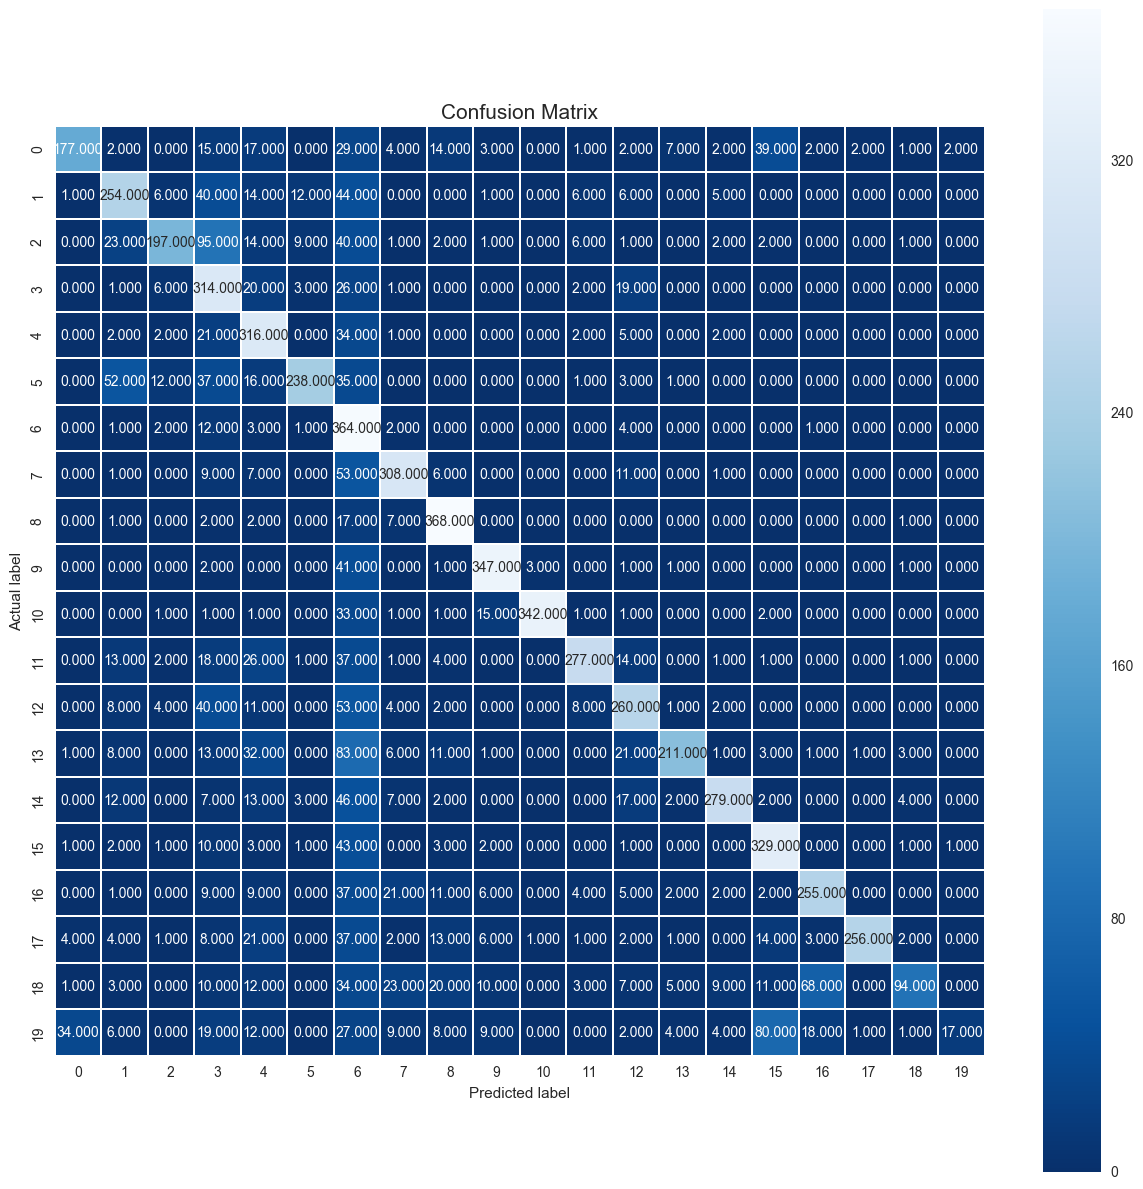

In [11]:
cm = pd.DataFrame(metrics.confusion_matrix(test.target, predicted))
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

## Q5

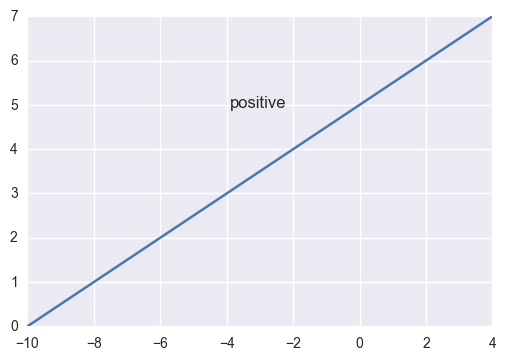

In [21]:
x = np.linspace(-10, 4, 10, endpoint=True)
y = (1 * x + 10) / 2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
plt.annotate(r'positive', xy=(-6, 4), xycoords='data', xytext=(+50, +30), textcoords='offset points', fontsize=12)

## Q7
Consider the following observations:

X = (-0.1, -0.2, 0.1, 0.2, 0, 0.1, -0.1, 0, -0.05, 0.1, 1.05, 1.1, 0.9, 0.8, 0.9, 1, 1.2, 1.1, 1.2, 0.9)

Cluster this data into 2 classes using the K-means algorithm. What are the cluster center?

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [13]:
X = [-0.1, -0.2, 0.1, 0.2, 0, 0.1, -0.1, 0, -0.05, 0.1, 1.05, 1.1, 0.9, 0.8, 0.9, 1, 1.2, 1.1, 1.2, 0.9]
X = np.array(X)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X.reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [14]:
kmeans.cluster_centers_

array([[ 1.015],
       [ 0.005]])

## Q8
Construct a Gaussian Mixture Model for the above data. What is your estimate for the number of mixtures?

http://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

In [56]:
import warnings 
warnings.filterwarnings('ignore')

for i in xrange(10):
    gmm = GMM(n_components=i+1)
    gmm.fit(X.reshape(-1,1))
    print 'Gaussian mixture model for', i+1, 'components, akaike information criterion (aic) for the current model is', gmm.aic(X.reshape(-1,1))
    print 'Gaussian mixture model for', i+1, 'components, bayesian information criterion (bic) for the current model is', gmm.bic(X.reshape(-1,1))
    print 'Gaussian mixture model for', i+1, 'components, means or estimates are: \n', gmm.means_

Gaussian mixture model for 1 components, akaike information criterion (aic) for the current model is 34.5821193028
Gaussian mixture model for 1 components, bayesian information criterion (bic) for the current model is 36.5735838499
Gaussian mixture model for 1 components, means or estimates are: 
[[ 0.51]]
Gaussian mixture model for 2 components, akaike information criterion (aic) for the current model is 10.5381568809
Gaussian mixture model for 2 components, bayesian information criterion (bic) for the current model is 15.5168182487
Gaussian mixture model for 2 components, means or estimates are: 
[[ 1.015]
 [ 0.005]]
Gaussian mixture model for 3 components, akaike information criterion (aic) for the current model is 16.5398113714
Gaussian mixture model for 3 components, bayesian information criterion (bic) for the current model is 24.5056695598
Gaussian mixture model for 3 components, means or estimates are: 
[[ 0.99375351]
 [ 0.005     ]
 [ 1.02049175]]
Gaussian mixture model for 4 

### 2 components were used like K-means, showing that the Gaussian mixture model means or estimates are the same as those found through K-means clustering. Also, n_components=2 has the lowest bic and aic therefore providing the best means.